In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:

dataset = pd.read_csv('dataset/dataWithWeather/AUS_WITH_WEATHER_2022.csv', index_col=0)

In [11]:
cols_to_keep = ['MKT_CARRIER_AIRLINE_ID', 'DEP_DELAY', 'DEP_DEL15']
new_dataset = dataset[cols_to_keep]

In [12]:
airlines_to_delay_map = dict()
airlines_count_map = dict()
for i, row in new_dataset.iterrows():
    airline = row['MKT_CARRIER_AIRLINE_ID']
    delay = row['DEP_DELAY']
    delay_15 = row['DEP_DEL15']
    if airline not in airlines_count_map:
        airlines_count_map[airline] = 1
    else:
        airlines_count_map[airline] += 1
    
    if airline not in airlines_to_delay_map:
        delay_map = dict()
        delay_map["delay"] = delay
        delay_map["delay_15"] = delay_15
        airlines_to_delay_map[airline] = delay_map
    else:
        delay_map = airlines_to_delay_map[airline]
        delay_map["delay"] += delay
        delay_map["delay_15"] += delay_15
        airlines_to_delay_map[airline] = delay_map

In [14]:
airlines_to_delay_map_averaged = dict()
for airline in airlines_to_delay_map:
    delay_map = airlines_to_delay_map[airline]
    delay_map["delay"] = delay_map["delay"] / airlines_count_map[airline]
    delay_map["delay_15"] = delay_map["delay_15"] / airlines_count_map[airline]
    airlines_to_delay_map_averaged[airline] = delay_map

In [32]:
airlines = list()
avg_delay = list()
avg_delay_15 = list()
for airline_id in airlines_to_delay_map_averaged:
    airlines.append(airline_id)
    avg_delay.append(airlines_to_delay_map_averaged[airline_id]["delay"])
    avg_delay_15.append(airlines_to_delay_map_averaged[airline_id]["delay_15"])

In [33]:
airline_id = pd.read_csv('dataset/AIRLINE_ID.csv')


In [34]:
airline_id_map = dict()
for i, row in airline_id.iterrows():
    airline_id_map[row['Code']] = row['Description']

In [35]:
airline_names = list()
for airline in airlines:
    airline_names.append(airline_id_map[airline])

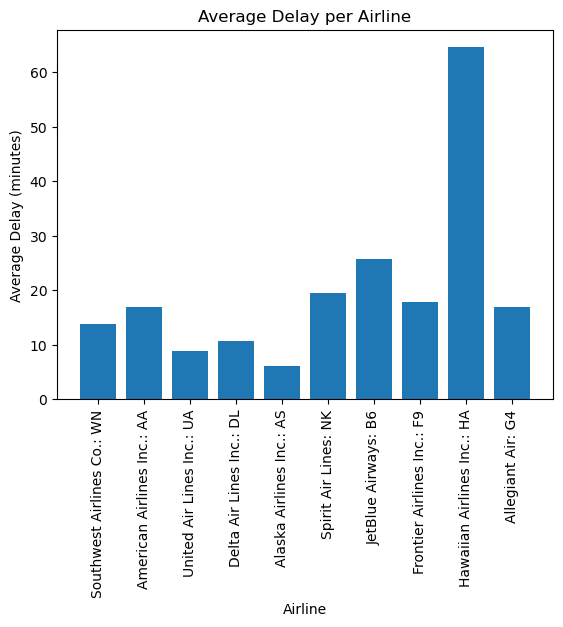

In [36]:
# now we have arrays of airline names, avg_delay, and avg_delay_15
# we can plot these in a bar graph

plt.bar(airline_names, avg_delay)
plt.xticks(rotation=90)
plt.title("Average Delay per Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()

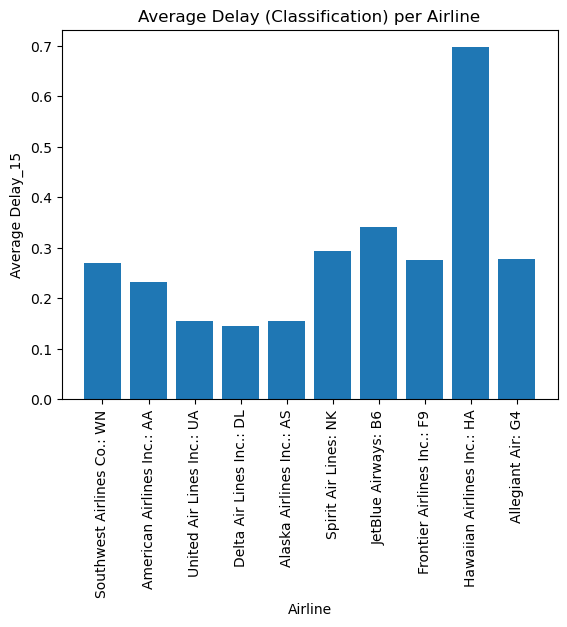

In [38]:
plt.bar(airline_names, avg_delay_15)
plt.xticks(rotation=90)
plt.title("Average Delay (Classification) per Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay_15")
plt.show()